# Exploratory Data Analysis of RLCS (Rocket League Championship Series) competitive matches

## Motivation/Background:

As a player on the UCLA Rocket League team, it was clear individual mechanical ability and decision-making skills were not enough to succeed on the pitch——team positioning, play-styles, kickoff strategies, communication, and more were integral components too. One day, my discovery of the public Octane.gg API led me to ponder whether analysis of matches of professional players and teams would yield any interesting insights. Over time, we might be able to observe the rise and fall of different "metas", aggressive playstyles, aerial-focused play, in-field passing, and other cool trends. More importantly, however, insights from this analysis may prove to be applicable and change the way our team competes for the better...

–––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Preface:

You may notice that throughout the analysis, I refrain from using *inplace=True* for any commands. This is because its usage is in general discouraged for a number of reasons—it is bug-prone, removes the ability for chaining, and is planned to be deprecated in the future. Additionally, in most cases it is no more efficient either, because under the hood, a new copy of the object is still created in order to overwrite the previous object.

In addition, I tend to use *.copy()* whenever modifying our dataframe, because we want to avoid the *SettingWithCopyWarning* that arises when we modify a subset of our dataframe. This is safe because we know the warning does not apply——we *want* to modify the original dataframe.

## Importing packages

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extracting our data from the octane.gg API:

To extract the series data, we retrieve 500 series per page, parse the data as JSON and convert it into a dataframe, then iterate through all the pages.

In [2]:
def get_page(page_num):
    response = requests.get(
        "https://zsr.octane.gg/matches",
        params= {
            "page": page_num,
            "perPage": 500})
    data = pd.DataFrame.from_dict(response.json())
    return data

As of May 8 2022, 6:10 PM PT, there are a total of 35029 series, so we will use a list comprehension to retrieve 71 pages of ~500 series each, and then concatenate them into a single dataframe.

Note that this step may take approximately 4-5 minutes because of the size of the dataset.

In [3]:
pages = [get_page(n+1) for n in range(75)]
df = pd.concat(pages, ignore_index=True)
df

,matches,page,perPage,pageSize
0,"{'_id': '6043145f91504896348eae05', 'slug': 'a...",1,500,500
1,"{'_id': '6043145f91504896348eae0c', 'slug': 'a...",1,500,500
2,"{'_id': '6043145f91504896348eae36', 'slug': 'a...",1,500,500
3,"{'_id': '6043145f91504896348eae2e', 'slug': 'a...",1,500,500
4,"{'_id': '6043145f91504896348eae30', 'slug': 'a...",1,500,500
...,...,...,...,...
35024,"{'_id': '6272cafec437fde7e02d58b1', 'slug': '5...",71,500,29
35025,"{'_id': '6272cafec437fde7e02d58b2', 'slug': '5...",71,500,29
35026,"{'_id': '6272cafec437fde7e02d58b3', 'slug': '5...",71,500,29
35027,"{'_id': '6272cafec437fde7e02d58b4', 'slug': '5...",71,500,29


Now, let's extract only the "matches" column and wring out its data into separate columns (which are currently in dictionary form):

In [4]:
df = pd.DataFrame(df['matches'].values.tolist(), index=df.index).copy()
df

,_id,slug,octane_id,event,stage,date,format,blue,orange,number,games,reverseSweepAttempt,reverseSweep
0,6043145f91504896348eae05,ae05-chasers-vs-team-synergy,1110201,"{'_id': '5f35882d53fbbb5894b43083', 'slug': '3...","{'_id': 1, 'name': 'Playoffs', 'format': 'brac...",2018-07-07T21:00:00Z,"{'type': 'best', 'length': 7}","{'score': 4, 'winner': True, 'team': {'team': ...","{'score': 2, 'team': {'team': {'_id': '6020bf0...",1.0,"[{'_id': '6043145f91504896348eae82', 'blue': 2...",NaN,NaN
1,6043145f91504896348eae0c,ae0c-lucky-bounce-vs-kings-of-urban,0010201,"{'_id': '5f35882d53fbbb5894b43039', 'slug': '3...","{'_id': 2, 'name': 'Regional Championship', 'f...",2016-07-09T00:00:00Z,"{'type': 'best', 'length': 7}","{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146091504896348eaf64', 'blue': 0...",NaN,NaN
2,6043145f91504896348eae36,ae36-cloud9-vs-gale-force,0200201,"{'_id': '5f35882d53fbbb5894b4306c', 'slug': '3...","{'_id': 1, 'name': 'Playoffs', 'format': 'brac...",2017-12-03T14:00:00Z,"{'type': 'best', 'length': 7}","{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146191504896348eb05e', 'blue': 1...",NaN,NaN
3,6043145f91504896348eae2e,ae2e-who-vs-canyons,1140101,"{'_id': '5f35882d53fbbb5894b4313d', 'slug': '3...","{'_id': 0, 'name': 'Main Event', 'format': 'br...",2020-05-23T12:00:00Z,"{'type': 'best', 'length': 5}",{'team': {'team': {'_id': '605d09394d63e1b16e2...,"{'score': 3, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb085', 'blue': 0...",NaN,NaN
4,6043145f91504896348eae30,ae30-chiefs-esports-vs-avant-gaming,1120201,"{'_id': '5f35882d53fbbb5894b43084', 'slug': '3...","{'_id': 1, 'name': 'Playoffs', 'format': 'brac...",2018-07-08T00:00:00Z,"{'type': 'best', 'length': 7}","{'score': 2, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb089', 'blue': 3...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35024,6272cafec437fde7e02d58b1,58b1-rust-eze-vs-pioneers,NaN,"{'_id': '6272ca73c437fde7e02d58ab', 'slug': '5...","{'_id': 0, 'name': 'Main Event'}",2022-05-04T10:00:00.739Z,"{'type': 'best', 'length': 5}","{'score': 2, 'team': {'team': {'_id': '616174e...","{'score': 3, 'winner': True, 'team': {'team': ...",6.0,NaN,NaN,NaN
35025,6272cafec437fde7e02d58b2,58b2-cowabunga-vs-team-bliss,NaN,"{'_id': '6272ca73c437fde7e02d58ab', 'slug': '5...","{'_id': 0, 'name': 'Main Event'}",2022-05-04T10:00:00Z,"{'type': 'best', 'length': 5}",{'team': {'team': {'_id': '6020c240f1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",7.0,"[{'_id': '6272cb8bc437fde7e02d58f5', 'blue': 0...",NaN,NaN
35026,6272cafec437fde7e02d58b3,58b3-pioneers-vs-team-bliss,NaN,"{'_id': '6272ca73c437fde7e02d58ab', 'slug': '5...","{'_id': 0, 'name': 'Main Event'}",2022-05-04T10:45:00.739Z,"{'type': 'best', 'length': 5}",{'team': {'team': {'_id': '6020c1bef1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",8.0,"[{'_id': '6272cbb1da9d7ca1c7bae04e', 'blue': 2...",NaN,NaN
35027,6272cafec437fde7e02d58b4,58b4-pwr-vs-team-bliss,NaN,"{'_id': '6272ca73c437fde7e02d58ab', 'slug': '5...","{'_id': 0, 'name': 'Main Event'}",2022-05-04T11:30:00.739Z,"{'type': 'best', 'length': 5}",{'team': {'team': {'_id': '60c8760388116f536df...,"{'score': 3, 'winner': True, 'team': {'team': ...",9.0,NaN,NaN,NaN


We can see that for many columns, their data remains hidden in a dictionary. We will flatten the dictionaries for some simple columns here, but leave the bulk of the data in the "blue", "orange", and "games" columns as they are for now because they contain many levels of nested dictionaries and will be complicated to extract.

In [5]:
event = pd.json_normalize(df['event'])
event

,_id,slug,name,region,mode,tier,image,groups
0,5f35882d53fbbb5894b43083,3083-sam-championship-season-1,SAM Championship Season 1,SAM,3,B,https://griffon.octane.gg/events/sam-champions...,NaN
1,5f35882d53fbbb5894b43039,3039-rlcs-season-1-north-america-stage-2,RLCS Season 1 North America Stage 2,NA,3,S,https://griffon.octane.gg/events/rlcs.png,"[rlcs, rlcs1, rlcsna, rlcs19, rlcs19lp]"
2,5f35882d53fbbb5894b4306c,306c-eleague-2017,ELEAGUE 2017,INT,3,S,https://griffon.octane.gg/events/eleague.png,NaN
3,5f35882d53fbbb5894b4313d,313d-red-bull-gaming-world-finals,Red Bull Gaming World Finals,EU,3,C,https://griffon.octane.gg/events/red-bull-gami...,NaN
4,5f35882d53fbbb5894b43084,3084-gfinity-australia-elite-series-season-1,Gfinity Australia Elite Series Season 1,OCE,3,A,https://griffon.octane.gg/events/gfinity.png,NaN
...,...,...,...,...,...,...,...,...
35024,6272ca73c437fde7e02d58ab,58ab-bluebird-rivals-superhero-spectacular,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN
35025,6272ca73c437fde7e02d58ab,58ab-bluebird-rivals-superhero-spectacular,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN
35026,6272ca73c437fde7e02d58ab,58ab-bluebird-rivals-superhero-spectacular,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN
35027,6272ca73c437fde7e02d58ab,58ab-bluebird-rivals-superhero-spectacular,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN


In [6]:
stage = pd.json_normalize(df['stage'])
stage

,_id,name,format,qualifier,lan
0,1,Playoffs,bracket-4se,NaN,NaN
1,2,Regional Championship,bracket-4se+3,NaN,NaN
2,1,Playoffs,bracket-4se,NaN,NaN
3,0,Main Event,bracket-4se,NaN,NaN
4,1,Playoffs,bracket-4se,NaN,NaN
...,...,...,...,...,...
35024,0,Main Event,NaN,NaN,NaN
35025,0,Main Event,NaN,NaN,NaN
35026,0,Main Event,NaN,NaN,NaN
35027,0,Main Event,NaN,NaN,NaN


In [7]:
formats = pd.json_normalize(df['format'])
formats

,type,length
0,best,7.0
1,best,7.0
2,best,7.0
3,best,5.0
4,best,7.0
...,...,...
35024,best,5.0
35025,best,5.0
35026,best,5.0
35027,best,5.0


Let's concatenate these three new dataframes back into our main dataframe and delete the original un-normalized ones.

Note: We have to be careful when dropping the original *format* column because there is now also a *format* column from the *stage* dataframe. To fix this, we'll just delete it from *df* before the concatenation.

In [8]:
df = df.drop(columns=["format"]).copy()
to_concat = [df, event, stage, formats]
df = pd.concat(to_concat, axis=1).copy()
df = df.drop(columns=["event", "stage"]).copy()
df

,_id,slug,octane_id,date,blue,orange,number,games,reverseSweepAttempt,reverseSweep,...,tier,image,groups,_id,name,format,qualifier,lan,type,length
0,6043145f91504896348eae05,ae05-chasers-vs-team-synergy,1110201,2018-07-07T21:00:00Z,"{'score': 4, 'winner': True, 'team': {'team': ...","{'score': 2, 'team': {'team': {'_id': '6020bf0...",1.0,"[{'_id': '6043145f91504896348eae82', 'blue': 2...",NaN,NaN,...,B,https://griffon.octane.gg/events/sam-champions...,NaN,1,Playoffs,bracket-4se,NaN,NaN,best,7.0
1,6043145f91504896348eae0c,ae0c-lucky-bounce-vs-kings-of-urban,0010201,2016-07-09T00:00:00Z,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146091504896348eaf64', 'blue': 0...",NaN,NaN,...,S,https://griffon.octane.gg/events/rlcs.png,"[rlcs, rlcs1, rlcsna, rlcs19, rlcs19lp]",2,Regional Championship,bracket-4se+3,NaN,NaN,best,7.0
2,6043145f91504896348eae36,ae36-cloud9-vs-gale-force,0200201,2017-12-03T14:00:00Z,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146191504896348eb05e', 'blue': 1...",NaN,NaN,...,S,https://griffon.octane.gg/events/eleague.png,NaN,1,Playoffs,bracket-4se,NaN,NaN,best,7.0
3,6043145f91504896348eae2e,ae2e-who-vs-canyons,1140101,2020-05-23T12:00:00Z,{'team': {'team': {'_id': '605d09394d63e1b16e2...,"{'score': 3, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb085', 'blue': 0...",NaN,NaN,...,C,https://griffon.octane.gg/events/red-bull-gami...,NaN,0,Main Event,bracket-4se,NaN,NaN,best,5.0
4,6043145f91504896348eae30,ae30-chiefs-esports-vs-avant-gaming,1120201,2018-07-08T00:00:00Z,"{'score': 2, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb089', 'blue': 3...",NaN,NaN,...,A,https://griffon.octane.gg/events/gfinity.png,NaN,1,Playoffs,bracket-4se,NaN,NaN,best,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35024,6272cafec437fde7e02d58b1,58b1-rust-eze-vs-pioneers,NaN,2022-05-04T10:00:00.739Z,"{'score': 2, 'team': {'team': {'_id': '616174e...","{'score': 3, 'winner': True, 'team': {'team': ...",6.0,NaN,NaN,NaN,...,C,https://griffon.octane.gg/events/superhero-spe...,NaN,0,Main Event,NaN,NaN,NaN,best,5.0
35025,6272cafec437fde7e02d58b2,58b2-cowabunga-vs-team-bliss,NaN,2022-05-04T10:00:00Z,{'team': {'team': {'_id': '6020c240f1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",7.0,"[{'_id': '6272cb8bc437fde7e02d58f5', 'blue': 0...",NaN,NaN,...,C,https://griffon.octane.gg/events/superhero-spe...,NaN,0,Main Event,NaN,NaN,NaN,best,5.0
35026,6272cafec437fde7e02d58b3,58b3-pioneers-vs-team-bliss,NaN,2022-05-04T10:45:00.739Z,{'team': {'team': {'_id': '6020c1bef1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",8.0,"[{'_id': '6272cbb1da9d7ca1c7bae04e', 'blue': 2...",NaN,NaN,...,C,https://griffon.octane.gg/events/superhero-spe...,NaN,0,Main Event,NaN,NaN,NaN,best,5.0
35027,6272cafec437fde7e02d58b4,58b4-pwr-vs-team-bliss,NaN,2022-05-04T11:30:00.739Z,{'team': {'team': {'_id': '60c8760388116f536df...,"{'score': 3, 'winner': True, 'team': {'team': ...",9.0,NaN,NaN,NaN,...,C,https://griffon.octane.gg/events/superhero-spe...,NaN,0,Main Event,NaN,NaN,NaN,best,5.0


We won't really need any of the "id" and "octane_id" column identifiers anymore, so let's drop all those columns too:

In [9]:
df = df.drop(columns=["_id", "octane_id"]).copy()
df

,slug,date,blue,orange,number,games,reverseSweepAttempt,reverseSweep,slug,name,...,mode,tier,image,groups,name,format,qualifier,lan,type,length
0,ae05-chasers-vs-team-synergy,2018-07-07T21:00:00Z,"{'score': 4, 'winner': True, 'team': {'team': ...","{'score': 2, 'team': {'team': {'_id': '6020bf0...",1.0,"[{'_id': '6043145f91504896348eae82', 'blue': 2...",NaN,NaN,3083-sam-championship-season-1,SAM Championship Season 1,...,3,B,https://griffon.octane.gg/events/sam-champions...,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
1,ae0c-lucky-bounce-vs-kings-of-urban,2016-07-09T00:00:00Z,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146091504896348eaf64', 'blue': 0...",NaN,NaN,3039-rlcs-season-1-north-america-stage-2,RLCS Season 1 North America Stage 2,...,3,S,https://griffon.octane.gg/events/rlcs.png,"[rlcs, rlcs1, rlcsna, rlcs19, rlcs19lp]",Regional Championship,bracket-4se+3,NaN,NaN,best,7.0
2,ae36-cloud9-vs-gale-force,2017-12-03T14:00:00Z,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146191504896348eb05e', 'blue': 1...",NaN,NaN,306c-eleague-2017,ELEAGUE 2017,...,3,S,https://griffon.octane.gg/events/eleague.png,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
3,ae2e-who-vs-canyons,2020-05-23T12:00:00Z,{'team': {'team': {'_id': '605d09394d63e1b16e2...,"{'score': 3, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb085', 'blue': 0...",NaN,NaN,313d-red-bull-gaming-world-finals,Red Bull Gaming World Finals,...,3,C,https://griffon.octane.gg/events/red-bull-gami...,NaN,Main Event,bracket-4se,NaN,NaN,best,5.0
4,ae30-chiefs-esports-vs-avant-gaming,2018-07-08T00:00:00Z,"{'score': 2, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb089', 'blue': 3...",NaN,NaN,3084-gfinity-australia-elite-series-season-1,Gfinity Australia Elite Series Season 1,...,3,A,https://griffon.octane.gg/events/gfinity.png,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35024,58b1-rust-eze-vs-pioneers,2022-05-04T10:00:00.739Z,"{'score': 2, 'team': {'team': {'_id': '616174e...","{'score': 3, 'winner': True, 'team': {'team': ...",6.0,NaN,NaN,NaN,58ab-bluebird-rivals-superhero-spectacular,BlueBird Rivals Superhero Spectacular,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
35025,58b2-cowabunga-vs-team-bliss,2022-05-04T10:00:00Z,{'team': {'team': {'_id': '6020c240f1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",7.0,"[{'_id': '6272cb8bc437fde7e02d58f5', 'blue': 0...",NaN,NaN,58ab-bluebird-rivals-superhero-spectacular,BlueBird Rivals Superhero Spectacular,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
35026,58b3-pioneers-vs-team-bliss,2022-05-04T10:45:00.739Z,{'team': {'team': {'_id': '6020c1bef1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",8.0,"[{'_id': '6272cbb1da9d7ca1c7bae04e', 'blue': 2...",NaN,NaN,58ab-bluebird-rivals-superhero-spectacular,BlueBird Rivals Superhero Spectacular,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
35027,58b4-pwr-vs-team-bliss,2022-05-04T11:30:00.739Z,{'team': {'team': {'_id': '60c8760388116f536df...,"{'score': 3, 'winner': True, 'team': {'team': ...",9.0,NaN,NaN,NaN,58ab-bluebird-rivals-superhero-spectacular,BlueBird Rivals Superhero Spectacular,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0


## Checking out our column data:

Great! Let's get a feel for what our column data looks like:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35029 entries, 0 to 35028
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   slug                 35029 non-null  object        
 1   date                 35027 non-null  datetime64[ns]
 2   blue                 33909 non-null  object        
 3   orange               33909 non-null  object        
 4   number               35028 non-null  float64       
 5   games                21272 non-null  object        
 6   reverseSweepAttempt  2338 non-null   object        
 7   reverseSweep         1156 non-null   object        
 8   slug                 35029 non-null  object        
 9   name                 35029 non-null  object        
 10  region               35029 non-null  object        
 11  mode                 35029 non-null  int64         
 12  tier                 35029 non-null  object        
 13  image                34788 non-

We can see our dates are stored in ISO 8601 format but are currently interpreted by pandas to be type *object*. Let's convert its dtype to a datetime object:

In [11]:
df["date"] = pd.to_datetime(df["date"]).dt.date
df["date"] = df["date"].astype('datetime64')
df["date"]

0       2018-07-07
1       2016-07-09
2       2017-12-03
3       2020-05-23
4       2018-07-08
           ...    
35024   2022-05-04
35025   2022-05-04
35026   2022-05-04
35027   2022-05-04
35028   2022-05-04
Name: date, Length: 35029, dtype: datetime64[ns]

Note that our date-times all had a "Z" at the end, indicating zero UTC offset, so we can safely assume all times have already been converted to UTC time and not worry about the headache that is determining timezones, where an event was played (and what about online events?), etc. Besides, any sort of time series analysis we may conduct will most likely focus heavily on long-term trends, so this shouldn't be a big problem.

Let's first rename our columns to something more descriptive——more importantly, we are avoiding duplicate names so it's easier to operate on those columns later:

In [13]:
df.columns = ["matchup", "date", "blue", "orange", "number", "games", "reverseSweepAttempt", "reverseSweep", "event-name", "event_name", "region", "mode", "tier", "image", "groups", "stage_name", "format", "qualifier", "lan", "type", "length"]

Note I confusingly named two adjacent columns "event-name" and "event_name". Yeah, that's because they provide redundant information. Let's drop the "event-name" column:

In [14]:
df = df.drop(columns=["event-name"]).copy()
df

,matchup,date,blue,orange,number,games,reverseSweepAttempt,reverseSweep,event_name,region,mode,tier,image,groups,stage_name,format,qualifier,lan,type,length
0,ae05-chasers-vs-team-synergy,2018-07-07,"{'score': 4, 'winner': True, 'team': {'team': ...","{'score': 2, 'team': {'team': {'_id': '6020bf0...",1.0,"[{'_id': '6043145f91504896348eae82', 'blue': 2...",NaN,NaN,SAM Championship Season 1,SAM,3,B,https://griffon.octane.gg/events/sam-champions...,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
1,ae0c-lucky-bounce-vs-kings-of-urban,2016-07-09,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146091504896348eaf64', 'blue': 0...",NaN,NaN,RLCS Season 1 North America Stage 2,NA,3,S,https://griffon.octane.gg/events/rlcs.png,"[rlcs, rlcs1, rlcsna, rlcs19, rlcs19lp]",Regional Championship,bracket-4se+3,NaN,NaN,best,7.0
2,ae36-cloud9-vs-gale-force,2017-12-03,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146191504896348eb05e', 'blue': 1...",NaN,NaN,ELEAGUE 2017,INT,3,S,https://griffon.octane.gg/events/eleague.png,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
3,ae2e-who-vs-canyons,2020-05-23,{'team': {'team': {'_id': '605d09394d63e1b16e2...,"{'score': 3, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb085', 'blue': 0...",NaN,NaN,Red Bull Gaming World Finals,EU,3,C,https://griffon.octane.gg/events/red-bull-gami...,NaN,Main Event,bracket-4se,NaN,NaN,best,5.0
4,ae30-chiefs-esports-vs-avant-gaming,2018-07-08,"{'score': 2, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb089', 'blue': 3...",NaN,NaN,Gfinity Australia Elite Series Season 1,OCE,3,A,https://griffon.octane.gg/events/gfinity.png,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35024,58b1-rust-eze-vs-pioneers,2022-05-04,"{'score': 2, 'team': {'team': {'_id': '616174e...","{'score': 3, 'winner': True, 'team': {'team': ...",6.0,NaN,NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
35025,58b2-cowabunga-vs-team-bliss,2022-05-04,{'team': {'team': {'_id': '6020c240f1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",7.0,"[{'_id': '6272cb8bc437fde7e02d58f5', 'blue': 0...",NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
35026,58b3-pioneers-vs-team-bliss,2022-05-04,{'team': {'team': {'_id': '6020c1bef1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",8.0,"[{'_id': '6272cbb1da9d7ca1c7bae04e', 'blue': 2...",NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
35027,58b4-pwr-vs-team-bliss,2022-05-04,{'team': {'team': {'_id': '60c8760388116f536df...,"{'score': 3, 'winner': True, 'team': {'team': ...",9.0,NaN,NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0


Let's revisit our trusty friend *df.info()*:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35029 entries, 0 to 35028
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   matchup              35029 non-null  string        
 1   date                 35027 non-null  datetime64[ns]
 2   blue                 33909 non-null  object        
 3   orange               33909 non-null  object        
 4   number               35028 non-null  float64       
 5   games                21272 non-null  object        
 6   reverseSweepAttempt  2338 non-null   object        
 7   reverseSweep         1156 non-null   object        
 8   event_name           35029 non-null  string        
 9   region               35029 non-null  object        
 10  mode                 35029 non-null  int64         
 11  tier                 35029 non-null  object        
 12  image                34788 non-null  object        
 13  groups               16309 non-

This is minor, but of course our "matchup", "event_name", and "stage_name" columns should all be strings. Let's convert those values into string datatypes:

In [16]:
df = df.astype({"matchup": "string", "event_name": "string", "stage_name": "string"}).copy()

*Note:* Pandas strings and objects are virtually interchangeable——the *object* datatype is still the default datatype for strings, while the StringDtype is relatively new. It is recommended to use StringDtype to store text data, because it is stricter and will not mask any accidental mixing of strings and non-strings as an object dtype would. With that being said, however, you may note later that some columns with string values are of object dtype, simply because functionally there is almost no difference, and I may forget to explicitly convert column types every time I append a new column.

In [18]:
df["matchup"].head()

0           ae05-chasers-vs-team-synergy
1    ae0c-lucky-bounce-vs-kings-of-urban
2              ae36-cloud9-vs-gale-force
3                    ae2e-who-vs-canyons
4    ae30-chiefs-esports-vs-avant-gaming
Name: matchup, dtype: string

Okay, but our *matchup* column in its current form still isn't very convenient for searching. There seems to be a unique alphanumeric sequence before the two teams' names serving as a unique identifier, but we *want* duplicates so that we can compare the same matchup over time/perform other types of equally informative analysis. So, let's clean up the strings a little bit:

In [19]:
df["matchup"] = df["matchup"].str[5:]

In [20]:
df["matchup"]

0               chasers-vs-team-synergy
1        lucky-bounce-vs-kings-of-urban
2                  cloud9-vs-gale-force
3                        who-vs-canyons
4        chiefs-esports-vs-avant-gaming
                      ...              
35024              rust-eze-vs-pioneers
35025           cowabunga-vs-team-bliss
35026            pioneers-vs-team-bliss
35027                 pwr-vs-team-bliss
35028           renegades-vs-team-bliss
Name: matchup, Length: 35029, dtype: string

Now there exist matchup duplicates:

In [21]:
df["matchup"].value_counts()

tbd-vs-tbd                              1253
nrg-esports-vs-g2-esports                 31
ground-zero-gaming-vs-renegades           26
spacestation-gaming-vs-rogue              25
g2-esports-vs-ghost-gaming                25
                                        ... 
minabo-de-kiev-vs-vibe-vibin               1
quoifeur-vs-vibe-vibin                     1
pog-vs-beyblade                            1
mustu-fluck-vs-not-fast-just-furious       1
cowabunga-vs-team-bliss                    1
Name: matchup, Length: 25851, dtype: Int64

Hmmm, there seems to be a lot of "tbd-vs-tbd" matchups. Let's just see what they look like:

In [22]:
pd.set_option('display.min_rows', 20)
df[df["matchup"] == "tbd-vs-tbd"]

,matchup,date,blue,orange,number,games,reverseSweepAttempt,reverseSweep,event_name,region,mode,tier,image,groups,stage_name,format,qualifier,lan,type,length
4082,tbd-vs-tbd,2020-11-29,{},{},5.0,NaN,NaN,NaN,Rocket Drift Season 3,NA,3,C,https://griffon.octane.gg/events/rocket-drift.png,NaN,Playoffs,8se,NaN,NaN,NaN,NaN
4084,tbd-vs-tbd,2020-11-29,{},{},6.0,NaN,NaN,NaN,Rocket Drift Season 3,NA,3,C,https://griffon.octane.gg/events/rocket-drift.png,NaN,Playoffs,8se,NaN,NaN,NaN,NaN
4085,tbd-vs-tbd,2020-11-30,{},{},7.0,NaN,NaN,NaN,Rocket Drift Season 3,NA,3,C,https://griffon.octane.gg/events/rocket-drift.png,NaN,Playoffs,8se,NaN,NaN,NaN,NaN
8925,tbd-vs-tbd,2021-01-24,{},{},1.0,NaN,NaN,NaN,Liga Raketa Season 5,EU,3,C,https://griffon.octane.gg/events/liga-raketa.png,NaN,Playoffs,bracket-4se,NaN,NaN,NaN,NaN
8926,tbd-vs-tbd,2021-01-24,{},{},2.0,NaN,NaN,NaN,Liga Raketa Season 5,EU,3,C,https://griffon.octane.gg/events/liga-raketa.png,NaN,Playoffs,bracket-4se,NaN,NaN,NaN,NaN
8927,tbd-vs-tbd,2021-01-24,{},{},3.0,NaN,NaN,NaN,Liga Raketa Season 5,EU,3,C,https://griffon.octane.gg/events/liga-raketa.png,NaN,Playoffs,bracket-4se,NaN,NaN,NaN,NaN
9108,tbd-vs-tbd,2020-12-05,{},{},7.0,NaN,NaN,NaN,Liga Raketa Season 5,EU,3,C,https://griffon.octane.gg/events/liga-raketa.png,NaN,Group Stage,rr-1g8,NaN,NaN,NaN,NaN
9109,tbd-vs-tbd,2020-12-05,{},{},8.0,NaN,NaN,NaN,Liga Raketa Season 5,EU,3,C,https://griffon.octane.gg/events/liga-raketa.png,NaN,Group Stage,rr-1g8,NaN,NaN,NaN,NaN
9111,tbd-vs-tbd,2020-12-06,{},{},9.0,NaN,NaN,NaN,Liga Raketa Season 5,EU,3,C,https://griffon.octane.gg/events/liga-raketa.png,NaN,Group Stage,rr-1g8,NaN,NaN,NaN,NaN
9112,tbd-vs-tbd,2020-12-06,{},{},10.0,NaN,NaN,NaN,Liga Raketa Season 5,EU,3,C,https://griffon.octane.gg/events/liga-raketa.png,NaN,Group Stage,rr-1g8,NaN,NaN,NaN,NaN


In [23]:
pd.reset_option('display.min_rows')

The reason I've displayed so many rows is because it highlights the fact that series with "tbd-vs-tbd" tend to have large amounts of missing data in other columns as well———data which is critical for analysis, such as the final series score, players, team, and individual stats, individual game scores, series progression and more, which is nested within the "blue", "orange" and "games" columns.

In fact, I scanned through all the rows, and only 4 series have information for at least one of the blue/orange columns. Therefore, let's remove all the above records save for those 4:

In [24]:
to_keep = df.index.isin([23042,23057,23072,23087])

In [25]:
to_drop = (df["matchup"] == "tbd-vs-tbd") & (~to_keep)

In [26]:
df = df.drop(df[to_drop].index).copy()

...And don't forget to reset the index.

In [27]:
df = df.reset_index(drop=True).copy()
df

,matchup,date,blue,orange,number,games,reverseSweepAttempt,reverseSweep,event_name,region,mode,tier,image,groups,stage_name,format,qualifier,lan,type,length
0,chasers-vs-team-synergy,2018-07-07,"{'score': 4, 'winner': True, 'team': {'team': ...","{'score': 2, 'team': {'team': {'_id': '6020bf0...",1.0,"[{'_id': '6043145f91504896348eae82', 'blue': 2...",NaN,NaN,SAM Championship Season 1,SAM,3,B,https://griffon.octane.gg/events/sam-champions...,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
1,lucky-bounce-vs-kings-of-urban,2016-07-09,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146091504896348eaf64', 'blue': 0...",NaN,NaN,RLCS Season 1 North America Stage 2,NA,3,S,https://griffon.octane.gg/events/rlcs.png,"[rlcs, rlcs1, rlcsna, rlcs19, rlcs19lp]",Regional Championship,bracket-4se+3,NaN,NaN,best,7.0
2,cloud9-vs-gale-force,2017-12-03,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146191504896348eb05e', 'blue': 1...",NaN,NaN,ELEAGUE 2017,INT,3,S,https://griffon.octane.gg/events/eleague.png,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
3,who-vs-canyons,2020-05-23,{'team': {'team': {'_id': '605d09394d63e1b16e2...,"{'score': 3, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb085', 'blue': 0...",NaN,NaN,Red Bull Gaming World Finals,EU,3,C,https://griffon.octane.gg/events/red-bull-gami...,NaN,Main Event,bracket-4se,NaN,NaN,best,5.0
4,chiefs-esports-vs-avant-gaming,2018-07-08,"{'score': 2, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb089', 'blue': 3...",NaN,NaN,Gfinity Australia Elite Series Season 1,OCE,3,A,https://griffon.octane.gg/events/gfinity.png,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33775,rust-eze-vs-pioneers,2022-05-04,"{'score': 2, 'team': {'team': {'_id': '616174e...","{'score': 3, 'winner': True, 'team': {'team': ...",6.0,NaN,NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
33776,cowabunga-vs-team-bliss,2022-05-04,{'team': {'team': {'_id': '6020c240f1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",7.0,"[{'_id': '6272cb8bc437fde7e02d58f5', 'blue': 0...",NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
33777,pioneers-vs-team-bliss,2022-05-04,{'team': {'team': {'_id': '6020c1bef1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",8.0,"[{'_id': '6272cbb1da9d7ca1c7bae04e', 'blue': 2...",NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
33778,pwr-vs-team-bliss,2022-05-04,{'team': {'team': {'_id': '60c8760388116f536df...,"{'score': 3, 'winner': True, 'team': {'team': ...",9.0,NaN,NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0


## Analyzing NA's and duplicates:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33780 entries, 0 to 33779
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   matchup              33780 non-null  string        
 1   date                 33778 non-null  datetime64[ns]
 2   blue                 33780 non-null  object        
 3   orange               33780 non-null  object        
 4   number               33779 non-null  float64       
 5   games                21272 non-null  object        
 6   reverseSweepAttempt  2338 non-null   object        
 7   reverseSweep         1156 non-null   object        
 8   event_name           33780 non-null  string        
 9   region               33780 non-null  object        
 10  mode                 33780 non-null  int64         
 11  tier                 33780 non-null  object        
 12  image                33539 non-null  object        
 13  groups               15315 non-

We can see there exist many null values in the "games" column, and of course in the "reverseSweepAttempt" and "reverseSweep" columns. Additionally, some less important columns such as "groups", "format", "qualifier", "lan" are missing many values as well.

In [30]:
df["reverseSweepAttempt"].value_counts()

True    2338
Name: reverseSweepAttempt, dtype: int64

In [31]:
df["reverseSweep"].value_counts()

True    1156
Name: reverseSweep, dtype: int64

Clearly, data is only inputted into these columns when they are True, as there are no False values. However, this does not mean 
all true reverse sweep attempts have been recorded; in other words, we can't simply fill all NaN values with False. In addition, when "reverseSweepAttempt" is True but "reverseSweep" is NaN, we do not know the outcome of the attempt and cannot fill in any particular value. Therefore, let's just leave the column data like this for now. Potentially we won't even touch these columns.

In [32]:
len(df[(df["reverseSweepAttempt"] == True) & (df["reverseSweep"] == True)])

1156

We note that whenever "reverseSweep" is True, "reverseSweepAttempt" is also True as well, as we obtain the same number of records as the number of non-null "reverseSweep" values. This makes logical sense and is not revolutionary——but had we obtained evidence to the contrary (i.e. a reverse sweep occurred and yet "reverseSweepAttempt" is NaN or False), we would've been able to fix this by imputing True values for "reverseSweepAttempt".

*Note:* Technically, I believe it could be possible for us to deduce and fill in the missing values of “reverseSweepAttempt” and “reverseSweep” for some series. However, this would be a Herculean, and also tediously mind-numbing task——for each and every series, we’d have to extract the series format (Best-of-3, 5, 7, etc.) as well as the game progression (e.g. 1-0, 2-4, 3-2, 4-1), then loop through those games, noting when a team is at match point and observing whether the other teams attempt a reverse sweep + whether it is ultimately successful. In addition, data for the “games” column is missing for more than 1/3 of the series.

*Therefore, this is left as an exercise to the reader.*

However, as seen above, there are only two records with null values for the date-time. That seems possible to fix manually:

In [33]:
df[pd.isna(df["date"])]

,matchup,date,blue,orange,number,games,reverseSweepAttempt,reverseSweep,event_name,region,mode,tier,image,groups,stage_name,format,qualifier,lan,type,length
22000,berlin-phoenix-vs-basilisks-berlin,NaT,"{'score': 4, 'winner': True, 'team': {'team': ...","{'score': 1, 'team': {'team': {'_id': '604da3d...",9.0,NaN,NaN,NaN,European University Rocketeers' Championship 2021,EU,3,C,https://griffon.octane.gg/events/eurc.png,NaN,Playoffs,bracket,NaN,NaN,best,7.0
22006,berlin-phoenix-vs-portsmouth-paladins,NaT,"{'score': 4, 'winner': True, 'team': {'team': ...","{'score': 3, 'team': {'team': {'_id': '604da3d...",11.0,NaN,NaN,NaN,European University Rocketeers' Championship 2021,EU,3,C,https://griffon.octane.gg/events/eurc.png,NaN,Playoffs,bracket,NaN,NaN,best,7.0


From the "event_name" and "stage_name" columns, we see that both series were played in the playoff bracket of the European University Rocketeers' Championship 2021. Digging around on liquipedia.net, we find EURC 2021 and scroll down to the playoff bracket. We then match up the series scores (4-1) and (4-3) shown in the "blue" and "orange" columns with the appropriate series and voila!

![NA Date 1](media/NAdate1.png)

![NA Date 2](media/NAdate2.png)

Let's fill in those values:

In [34]:
df.at[22000, "date"] = pd.to_datetime("2021-04-19")
df.at[22006, "date"] = pd.to_datetime("2021-04-25")

## The problem with matchups

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33780 entries, 0 to 33779
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   matchup              33780 non-null  string        
 1   date                 33780 non-null  datetime64[ns]
 2   blue                 33780 non-null  object        
 3   orange               33780 non-null  object        
 4   number               33779 non-null  float64       
 5   games                21272 non-null  object        
 6   reverseSweepAttempt  2338 non-null   object        
 7   reverseSweep         1156 non-null   object        
 8   event_name           33780 non-null  string        
 9   region               33780 non-null  object        
 10  mode                 33780 non-null  int64         
 11  tier                 33780 non-null  object        
 12  image                33539 non-null  object        
 13  groups               15315 non-

In [38]:
df["matchup"].value_counts()

nrg-esports-vs-g2-esports          31
ground-zero-gaming-vs-renegades    26
g2-esports-vs-ghost-gaming         25
spacestation-gaming-vs-rogue       25
g2-esports-vs-nrg-esports          24
                                   ..
lost-legion-giants-vs-slim_ofa      1
allmid-vs-nxt-esports               1
dapper-dogs-vs-mist-esports         1
digital-devils-vs-ballchasers       1
cowabunga-vs-team-bliss             1
Name: matchup, Length: 25851, dtype: Int64

Back to the matchups. There are 25,851 unique matchups out of 33,780 series (as of May 8 2022 6:10 PT), which seems oddly high.

**My proposition: The matchup names are ordered, so when the same two teams play each other but on opposite teams (blue vs. orange), they count as unique, but of course that's not what we want. Let's investigate:**

Take, for example, the most frequent matchup as stated by our current data: NRG Esports vs. G2 Esports, with 31 series:

In [39]:
df[df["matchup"] == "nrg-esports-vs-g2-esports"]["matchup"].count()

31

Now let's swap the order of the teams and see if we get any matches:

In [40]:
df[df["matchup"] == "g2-esports-vs-nrg-esports"]["matchup"].count()

24

**Aha!** So there are indeed, on average, almost twice as many of the same matchups as displayed.

Now the question is, how do we recognize these duplicates and consolidate them, *without* losing critical information relating our "blue" and "orange" column data to the correct teams?

I propose the following general approach:  

**Step 1: Split the current "matchup" column into two new columns "blue_team" and "orange_team" and create a new dataframe with these columns to retain information about which team was on which side.**

**Step 2: Sort the team names alphabetically into lists of pairs.**

**Step 3: Iterate through the dataframe and swap blue and orange teams if the order is different from its corresponding sorted list. This allows matchups which are reverse duplicates to be treated as if they are identical.**

## Performing surgery on our matchup reverse duplicates

#### Step 1: Splitting our "matchup" column

To begin, we've got to split our matchups into their individual teams:

In [41]:
df["matchup"]

0               chasers-vs-team-synergy
1        lucky-bounce-vs-kings-of-urban
2                  cloud9-vs-gale-force
3                        who-vs-canyons
4        chiefs-esports-vs-avant-gaming
                      ...              
33775              rust-eze-vs-pioneers
33776           cowabunga-vs-team-bliss
33777            pioneers-vs-team-bliss
33778                 pwr-vs-team-bliss
33779           renegades-vs-team-bliss
Name: matchup, Length: 33780, dtype: string

In [42]:
matchups = [matchup.split('-vs-') for matchup in df["matchup"]]
matchups[0:10]

[['chasers', 'team-synergy'],
 ['lucky-bounce', 'kings-of-urban'],
 ['cloud9', 'gale-force'],
 ['who', 'canyons'],
 ['chiefs-esports', 'avant-gaming'],
 ['endpoint', 'prophecy'],
 ['nrg-esports', 'settodestroyx'],
 ['allegiance', 'out-of-style'],
 ['team-envy', 'the-juicy-kids'],
 ['nrg-esports', 'the-muffin-men']]

Okay, but when teams have more than one word, the hyphens in between remain. Since "matchups" is now itself a list, we're going to need a nested list comprehension:

In [43]:
team_names = [[team_name.replace("-", " ") for team_name in matchup] for matchup in matchups]
team_names[0:10]

[['chasers', 'team synergy'],
 ['lucky bounce', 'kings of urban'],
 ['cloud9', 'gale force'],
 ['who', 'canyons'],
 ['chiefs esports', 'avant gaming'],
 ['endpoint', 'prophecy'],
 ['nrg esports', 'settodestroyx'],
 ['allegiance', 'out of style'],
 ['team envy', 'the juicy kids'],
 ['nrg esports', 'the muffin men']]

Perfect. Now let's create a dataframe with these matchups:

In [44]:
matchup_df = pd.DataFrame(team_names).copy()
matchup_df.columns = ["blue_team", "orange_team"]
matchup_df

,blue_team,orange_team
0,chasers,team synergy
1,lucky bounce,kings of urban
2,cloud9,gale force
3,who,canyons
4,chiefs esports,avant gaming
...,...,...
33775,rust eze,pioneers
33776,cowabunga,team bliss
33777,pioneers,team bliss
33778,pwr,team bliss


Before we move forward, let's append this to our original dataframe. We also won't need the "matchup" column afterwards because the blue_team and orange_team columns encode the same information in a clearer format.

In [45]:
df = pd.concat([matchup_df, df], axis=1).copy()
df = df.drop(columns=["matchup"]).copy()
df

,blue_team,orange_team,date,blue,orange,number,games,reverseSweepAttempt,reverseSweep,event_name,...,mode,tier,image,groups,stage_name,format,qualifier,lan,type,length
0,chasers,team synergy,2018-07-07,"{'score': 4, 'winner': True, 'team': {'team': ...","{'score': 2, 'team': {'team': {'_id': '6020bf0...",1.0,"[{'_id': '6043145f91504896348eae82', 'blue': 2...",NaN,NaN,SAM Championship Season 1,...,3,B,https://griffon.octane.gg/events/sam-champions...,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
1,lucky bounce,kings of urban,2016-07-09,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146091504896348eaf64', 'blue': 0...",NaN,NaN,RLCS Season 1 North America Stage 2,...,3,S,https://griffon.octane.gg/events/rlcs.png,"[rlcs, rlcs1, rlcsna, rlcs19, rlcs19lp]",Regional Championship,bracket-4se+3,NaN,NaN,best,7.0
2,cloud9,gale force,2017-12-03,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146191504896348eb05e', 'blue': 1...",NaN,NaN,ELEAGUE 2017,...,3,S,https://griffon.octane.gg/events/eleague.png,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
3,who,canyons,2020-05-23,{'team': {'team': {'_id': '605d09394d63e1b16e2...,"{'score': 3, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb085', 'blue': 0...",NaN,NaN,Red Bull Gaming World Finals,...,3,C,https://griffon.octane.gg/events/red-bull-gami...,NaN,Main Event,bracket-4se,NaN,NaN,best,5.0
4,chiefs esports,avant gaming,2018-07-08,"{'score': 2, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb089', 'blue': 3...",NaN,NaN,Gfinity Australia Elite Series Season 1,...,3,A,https://griffon.octane.gg/events/gfinity.png,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33775,rust eze,pioneers,2022-05-04,"{'score': 2, 'team': {'team': {'_id': '616174e...","{'score': 3, 'winner': True, 'team': {'team': ...",6.0,NaN,NaN,NaN,BlueBird Rivals Superhero Spectacular,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
33776,cowabunga,team bliss,2022-05-04,{'team': {'team': {'_id': '6020c240f1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",7.0,"[{'_id': '6272cb8bc437fde7e02d58f5', 'blue': 0...",NaN,NaN,BlueBird Rivals Superhero Spectacular,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
33777,pioneers,team bliss,2022-05-04,{'team': {'team': {'_id': '6020c1bef1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",8.0,"[{'_id': '6272cbb1da9d7ca1c7bae04e', 'blue': 2...",NaN,NaN,BlueBird Rivals Superhero Spectacular,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
33778,pwr,team bliss,2022-05-04,{'team': {'team': {'_id': '60c8760388116f536df...,"{'score': 3, 'winner': True, 'team': {'team': ...",9.0,NaN,NaN,NaN,BlueBird Rivals Superhero Spectacular,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0


### Actually finding the reverse duplicates

So, originally I was planning to use a clever trick to find the reverse duplicates and operate on them separately from matchups that did not have reverse duplicates. (For the curious, the trick was to create a new dataframe with the column names swapped, and perform an inner join to find the reverse duplicates.)

However, I ultimately decided it was just easier to operate on all the series at once via iteration, as it doesn't take too long.

**Okay, let's refresh our memory. We are looking to, in some way or another, allow our original dataframe to treat reverse matchup duplicates as if they are exact duplicates——because then we can group matchups properly and perform analyses.** The most straightforward approach here is to create a new column in our dataframe that states the matchup regardless of order.

So, let's apply the general strategy I outlined earlier:

**Step 1: Sort each combination of teams alphabetically and create a new column with this data.**  
**Step 2: Compare each blue_team, orange_team matchup with the order of the column in Step 1; if it is different, swap the names.**  
**Step 3: Concatenate the team names into a new column and append this back to our original dataframe.**

### Step 1:

Before we can start sorting our teams, we need to check for null values. 

In [46]:
matchup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33780 entries, 0 to 33779
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   blue_team    33780 non-null  object
 1   orange_team  33774 non-null  object
dtypes: object(2)
memory usage: 527.9+ KB


In [47]:
matchup_df[pd.isnull(matchup_df["orange_team"])]

,blue_team,orange_team
11214,kim kardashian vs,None
12654,illusionist esports vs,None
13566,vs sway green,None
14405,clappers vs,None
20017,vs no clue,None
20025,big goose vs,None


So, it turns out when we split our raw "matchup" column earlier, there were some series missing a blue/orange team name.  

This is simply a matter of what we want to do with such types of series. I say let's assign their team name to be "tbd". We'll also have to remove the "vs" from the blue_team names.

In [48]:
matchup_df[pd.isnull(matchup_df["orange_team"])] = matchup_df[pd.isnull(matchup_df["orange_team"])].replace("vs", "", regex=True)
matchup_df[pd.isnull(matchup_df["orange_team"])] = matchup_df[pd.isnull(matchup_df["orange_team"])].fillna("tbd")

You may note we're just taking the team name that exists and slapping it under *blue_team*, although perhaps when the "vs" comes first, the team name that follows should actually be that of the orange_team. However, this really doesn't matter as we won't be looking at these series.

Okay, now we can actually do the sorting.

In [53]:
matchup_df["sorted"] = [sorted([x,y]) for x,y in zip(matchup_df["blue_team"], matchup_df["orange_team"])]
matchup_df

,blue_team,orange_team,sorted
0,chasers,team synergy,"[chasers, team synergy]"
1,lucky bounce,kings of urban,"[kings of urban, lucky bounce]"
2,cloud9,gale force,"[cloud9, gale force]"
3,who,canyons,"[canyons, who]"
4,chiefs esports,avant gaming,"[avant gaming, chiefs esports]"
...,...,...,...
33775,rust eze,pioneers,"[pioneers, rust eze]"
33776,cowabunga,team bliss,"[cowabunga, team bliss]"
33777,pioneers,team bliss,"[pioneers, team bliss]"
33778,pwr,team bliss,"[pwr, team bliss]"


### Step 2:

It's time to execute the actual team name swapping. We iterate through the list, checking if the blue_team and orange_team names are in the same order as that of the "sorted" column——if not, we swap them.

In [54]:
for i in matchup_df.index:
    matchup_list = [matchup_df["blue_team"][i], matchup_df["orange_team"][i]]
    if matchup_list != matchup_df["sorted"][i]:
        matchup_df["blue_team"][i] = matchup_df["sorted"][i][0]
        matchup_df["orange_team"][i] = matchup_df["sorted"][i][1]
matchup_df

,blue_team,orange_team,sorted
0,chasers,team synergy,"[chasers, team synergy]"
1,kings of urban,lucky bounce,"[kings of urban, lucky bounce]"
2,cloud9,gale force,"[cloud9, gale force]"
3,canyons,who,"[canyons, who]"
4,avant gaming,chiefs esports,"[avant gaming, chiefs esports]"
...,...,...,...
33775,pioneers,rust eze,"[pioneers, rust eze]"
33776,cowabunga,team bliss,"[cowabunga, team bliss]"
33777,pioneers,team bliss,"[pioneers, team bliss]"
33778,pwr,team bliss,"[pwr, team bliss]"


Perfect. See that we've now changed the order of "blue_team" and "orange_team" so that it aligns with the order in the "sorted" column? Now, we can concatenate the team names:

In [55]:
matchup_df["matchup"] = matchup_df["blue_team"] + " " + "vs" + " " + matchup_df["orange_team"]
matchup_df = matchup_df.drop(columns=["blue_team", "orange_team", "sorted"])
matchup_df

,matchup
0,chasers vs team synergy
1,kings of urban vs lucky bounce
2,cloud9 vs gale force
3,canyons vs who
4,avant gaming vs chiefs esports
...,...
33775,pioneers vs rust eze
33776,cowabunga vs team bliss
33777,pioneers vs team bliss
33778,pwr vs team bliss


In [56]:
matchup_df.value_counts()

matchup                              
g2 esports vs nrg esports                55
ground zero gaming vs renegades          49
nrg esports vs spacestation gaming       37
nrg esports vs rogue                     36
rogue vs spacestation gaming             35
                                         ..
down two earth vs team envy               1
down two earth vs susquehanna soniqs      1
down two earth vs stromboli               1
down two earth vs spacestation gaming     1
zap vs zero empathy                       1
Length: 22944, dtype: int64

Looks like we were successful in consolidating reverse duplicates into this count! There seem to be still almost 23,000 unique series——this isn't too surprising, however. The vast majority of teams appear in very few events before making name changes, roster changes, leaving the scene, falling behind, etc.

Ok, perfect. Now all that remains is for us to append this column back into our original dataframe.

In [57]:
df = pd.concat([matchup_df, df], axis=1).copy()
df

,matchup,blue_team,orange_team,date,blue,orange,number,games,reverseSweepAttempt,reverseSweep,...,mode,tier,image,groups,stage_name,format,qualifier,lan,type,length
0,chasers vs team synergy,chasers,team synergy,2018-07-07,"{'score': 4, 'winner': True, 'team': {'team': ...","{'score': 2, 'team': {'team': {'_id': '6020bf0...",1.0,"[{'_id': '6043145f91504896348eae82', 'blue': 2...",NaN,NaN,...,3,B,https://griffon.octane.gg/events/sam-champions...,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
1,kings of urban vs lucky bounce,lucky bounce,kings of urban,2016-07-09,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146091504896348eaf64', 'blue': 0...",NaN,NaN,...,3,S,https://griffon.octane.gg/events/rlcs.png,"[rlcs, rlcs1, rlcsna, rlcs19, rlcs19lp]",Regional Championship,bracket-4se+3,NaN,NaN,best,7.0
2,cloud9 vs gale force,cloud9,gale force,2017-12-03,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146191504896348eb05e', 'blue': 1...",NaN,NaN,...,3,S,https://griffon.octane.gg/events/eleague.png,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
3,canyons vs who,who,canyons,2020-05-23,{'team': {'team': {'_id': '605d09394d63e1b16e2...,"{'score': 3, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb085', 'blue': 0...",NaN,NaN,...,3,C,https://griffon.octane.gg/events/red-bull-gami...,NaN,Main Event,bracket-4se,NaN,NaN,best,5.0
4,avant gaming vs chiefs esports,chiefs esports,avant gaming,2018-07-08,"{'score': 2, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb089', 'blue': 3...",NaN,NaN,...,3,A,https://griffon.octane.gg/events/gfinity.png,NaN,Playoffs,bracket-4se,NaN,NaN,best,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33775,pioneers vs rust eze,rust eze,pioneers,2022-05-04,"{'score': 2, 'team': {'team': {'_id': '616174e...","{'score': 3, 'winner': True, 'team': {'team': ...",6.0,NaN,NaN,NaN,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
33776,cowabunga vs team bliss,cowabunga,team bliss,2022-05-04,{'team': {'team': {'_id': '6020c240f1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",7.0,"[{'_id': '6272cb8bc437fde7e02d58f5', 'blue': 0...",NaN,NaN,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
33777,pioneers vs team bliss,pioneers,team bliss,2022-05-04,{'team': {'team': {'_id': '6020c1bef1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",8.0,"[{'_id': '6272cbb1da9d7ca1c7bae04e', 'blue': 2...",NaN,NaN,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0
33778,pwr vs team bliss,pwr,team bliss,2022-05-04,{'team': {'team': {'_id': '60c8760388116f536df...,"{'score': 3, 'winner': True, 'team': {'team': ...",9.0,NaN,NaN,NaN,...,3,C,https://griffon.octane.gg/events/superhero-spe...,NaN,Main Event,NaN,NaN,NaN,best,5.0


Some more small quality-of-life improvements——let's condense the "type" and "length" columns and drop the "image" column, as we won't need image logos in our statistical analyses

In [58]:
df["length"] = ("Bo" + df["length"].astype(str)).str.slice(stop=3)
df = df.drop(columns=["type", "image"]).copy()
df

,matchup,blue_team,orange_team,date,blue,orange,number,games,reverseSweepAttempt,reverseSweep,event_name,region,mode,tier,groups,stage_name,format,qualifier,lan,length
0,chasers vs team synergy,chasers,team synergy,2018-07-07,"{'score': 4, 'winner': True, 'team': {'team': ...","{'score': 2, 'team': {'team': {'_id': '6020bf0...",1.0,"[{'_id': '6043145f91504896348eae82', 'blue': 2...",NaN,NaN,SAM Championship Season 1,SAM,3,B,NaN,Playoffs,bracket-4se,NaN,NaN,Bo7
1,kings of urban vs lucky bounce,lucky bounce,kings of urban,2016-07-09,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146091504896348eaf64', 'blue': 0...",NaN,NaN,RLCS Season 1 North America Stage 2,NA,3,S,"[rlcs, rlcs1, rlcsna, rlcs19, rlcs19lp]",Regional Championship,bracket-4se+3,NaN,NaN,Bo7
2,cloud9 vs gale force,cloud9,gale force,2017-12-03,"{'score': 1, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146191504896348eb05e', 'blue': 1...",NaN,NaN,ELEAGUE 2017,INT,3,S,NaN,Playoffs,bracket-4se,NaN,NaN,Bo7
3,canyons vs who,who,canyons,2020-05-23,{'team': {'team': {'_id': '605d09394d63e1b16e2...,"{'score': 3, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb085', 'blue': 0...",NaN,NaN,Red Bull Gaming World Finals,EU,3,C,NaN,Main Event,bracket-4se,NaN,NaN,Bo5
4,avant gaming vs chiefs esports,chiefs esports,avant gaming,2018-07-08,"{'score': 2, 'team': {'team': {'_id': '6020bc7...","{'score': 4, 'winner': True, 'team': {'team': ...",1.0,"[{'_id': '6043146291504896348eb089', 'blue': 3...",NaN,NaN,Gfinity Australia Elite Series Season 1,OCE,3,A,NaN,Playoffs,bracket-4se,NaN,NaN,Bo7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33775,pioneers vs rust eze,rust eze,pioneers,2022-05-04,"{'score': 2, 'team': {'team': {'_id': '616174e...","{'score': 3, 'winner': True, 'team': {'team': ...",6.0,NaN,NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,NaN,Main Event,NaN,NaN,NaN,Bo5
33776,cowabunga vs team bliss,cowabunga,team bliss,2022-05-04,{'team': {'team': {'_id': '6020c240f1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",7.0,"[{'_id': '6272cb8bc437fde7e02d58f5', 'blue': 0...",NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,NaN,Main Event,NaN,NaN,NaN,Bo5
33777,pioneers vs team bliss,pioneers,team bliss,2022-05-04,{'team': {'team': {'_id': '6020c1bef1e4807cc70...,"{'score': 3, 'winner': True, 'team': {'team': ...",8.0,"[{'_id': '6272cbb1da9d7ca1c7bae04e', 'blue': 2...",NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,NaN,Main Event,NaN,NaN,NaN,Bo5
33778,pwr vs team bliss,pwr,team bliss,2022-05-04,{'team': {'team': {'_id': '60c8760388116f536df...,"{'score': 3, 'winner': True, 'team': {'team': ...",9.0,NaN,NaN,NaN,BlueBird Rivals Superhero Spectacular,OCE,3,C,NaN,Main Event,NaN,NaN,NaN,Bo5


## Unraveling the "blue", "orange" and "games" columns

At this point, the bulk of the interesting code and game statistics is still hidden away in deeply nested lists of JSON dictionaries in the "blue", "orange", and "games" columns. In order to perform our exploratory (and further visualisations, we will no doubt need to reformat and present this information in an easy-to-access way.

Let's do our engineering on the blue team first, and the process will be analogous for the orange team later:

#### Blue team:

In [59]:
blue_df = pd.json_normalize(df["blue"])
blue_df

,score,winner,players,team.team._id,team.team.slug,team.team.name,team.team.image,team.stats.core.shots,team.stats.core.goals,team.stats.core.saves,...,team.stats.positioning.timeNeutralThird,team.stats.positioning.timeOffensiveThird,team.stats.positioning.timeDefensiveHalf,team.stats.positioning.timeOffensiveHalf,team.stats.positioning.timeBehindBall,team.stats.positioning.timeInfrontBall,team.stats.demo.inflicted,team.stats.demo.taken,team.team.region,team.team.relevant
0,4.0,True,[{'player': {'_id': '5f3d8fdd95f40596eae23f4d'...,6020bd08f1e4807cc7008781,8781-chasers,Chasers,https://griffon.octane.gg/teams/chasers.png,41.0,12.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,[{'player': {'_id': '5f3d8fdd95f40596eae23d6e'...,6020bc70f1e4807cc70023c9,23c9-lucky-bounce,Lucky Bounce,https://griffon.octane.gg/teams/Lucky_Bounce_2...,28.0,7.0,11.0,...,1273.02,867.25,2690.55,1485.95,2939.21,1237.62,3.0,8.0,NaN,NaN
2,1.0,NaN,[{'player': {'_id': '5f3d8fdd95f40596eae23d72'...,6020bc70f1e4807cc700239d,239d-cloud9,Cloud9,https://griffon.octane.gg/teams/cloud9.png,38.0,8.0,31.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,[{'player': {'_id': '5f3d8fdd95f40596eae23de1'...,605d09394d63e1b16e2bf768,f768-who,who?,NaN,12.0,0.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,NaN,[{'player': {'_id': '5f3d8fdd95f40596eae23dff'...,6020bc70f1e4807cc70023ce,23ce-chiefs-esports,Chiefs Esports,https://griffon.octane.gg/teams/chiefs-esports...,44.0,13.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33775,2.0,NaN,NaN,616174e2143c37878b2388c9,88c9-rust-eze,Rust-eze,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCE,NaN
33776,NaN,NaN,[{'player': {'_id': '5f3d8fdd95f40596eae24550'...,6020c240f1e4807cc7027ed3,7ed3-cowabunga,Cowabunga,https://griffon.octane.gg/teams/cowabunga.png,12.0,3.0,11.0,...,904.81,559.36,2193.94,960.37,2180.05,974.28,6.0,13.0,OCE,True
33777,NaN,NaN,[{'player': {'_id': '5f7ca648ea8a0f0714fb9a22'...,6020c1bef1e4807cc70258d0,58d0-pioneers,Pioneers,https://griffon.octane.gg/teams/Kansas_City_Pi...,20.0,4.0,22.0,...,999.50,672.00,1882.59,1165.81,2053.31,995.10,9.0,11.0,OCE,True
33778,NaN,NaN,NaN,60c8760388116f536df96be7,6be7-pwr,PWR,https://griffon.octane.gg/teams/PWR.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OCE,True


#### Blue team players

In [60]:
blue_players_df = pd.json_normalize(blue_df["players"])
blue_players_df

,0,1,2,3,4,5
0,"{'player._id': '5f3d8fdd95f40596eae23f4d', 'pl...","{'player._id': '5f99d0c8786e9eb85284db78', 'pl...","{'player._id': '5f3d8fdd95f40596eae23f65', 'pl...",None,None,None
1,"{'player._id': '5f3d8fdd95f40596eae23d6e', 'pl...","{'player._id': '5f3d8fdd95f40596eae23d71', 'pl...","{'player._id': '5f3d8fdd95f40596eae23d72', 'pl...",None,None,None
2,"{'player._id': '5f3d8fdd95f40596eae23d72', 'pl...","{'player._id': '5f3d8fdd95f40596eae23d94', 'pl...","{'player._id': '5f3d8fdd95f40596eae23d95', 'pl...",None,None,None
3,"{'player._id': '5f3d8fdd95f40596eae23de1', 'pl...","{'player._id': '5f3d8fdd95f40596eae23e28', 'pl...","{'player._id': '5f3d8fdd95f40596eae23e2b', 'pl...",None,None,None
4,"{'player._id': '5f3d8fdd95f40596eae23dff', 'pl...","{'player._id': '5f3d8fdd95f40596eae23e00', 'pl...","{'player._id': '5f3d8fdd95f40596eae23e01', 'pl...",None,None,None
...,...,...,...,...,...,...
33775,None,None,None,None,None,None
33776,"{'player._id': '5f3d8fdd95f40596eae24550', 'pl...","{'player._id': '5f77af45a0cb87e0663bc49b', 'pl...","{'player._id': '5f3d8fdd95f40596eae24551', 'pl...",None,None,None
33777,"{'player._id': '5f7ca648ea8a0f0714fb9a22', 'pl...","{'player._id': '5fadd1baa392ba2afb9f1caa', 'pl...","{'player._id': '5faeab4de9ce4ed313ea7516', 'pl...",None,None,None
33778,None,None,None,None,None,None


Yikes, that's not what we want at all. Right now we have data of the 3+ blue team players for each series still hidden away. We want the data of each player for each series. This necessitates another round of json_normalize. Also, since there is more than one blue team player per series and players can appear more than once, we need to somehow keep track of the series their stats are tied to. To do so, let's break down each of the columns first and then concatenate the resulting dataframes while ignoring index. This allows us to retain the index as a unique series identifier.

In [61]:
first_blue_player_df = pd.json_normalize(blue_players_df[blue_players_df.columns[0]])
first_blue_player_df

,player._id,player.slug,player.tag,player.country,stats.core.shots,stats.core.goals,stats.core.saves,stats.core.assists,stats.core.score,stats.core.shootingPercentage,...,player.accounts,player.relevant,player.team._id,player.team.slug,player.team.name,player.team.region,player.team.image,player.team.relevant,player.coach,player.substitute
0,5f3d8fdd95f40596eae23f4d,3f4d-caiotg1,CaioTG1,br,14.0,5.0,7.0,6.0,1620.0,35.714286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f3d8fdd95f40596eae23d6e,3d6e-darkfire,DarkFire,us,13.0,1.0,6.0,3.0,1005.0,7.692308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f3d8fdd95f40596eae23d72,3d72-torment,Torment,us,11.0,0.0,12.0,3.0,1390.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f3d8fdd95f40596eae23de1,3de1-rix_ronday,Rix_Ronday,nl,4.0,0.0,3.0,0.0,604.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f3d8fdd95f40596eae23dff,3dff-drippay,Drippay,au,24.0,8.0,8.0,3.0,1990.0,33.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33776,5f3d8fdd95f40596eae24550,4550-joel,Joel,au,5.0,2.0,3.0,0.0,806.0,40.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33777,5f7ca648ea8a0f0714fb9a22,9a22-scrub,Scrub,au,7.0,2.0,3.0,0.0,913.0,28.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
second_blue_player_df = pd.json_normalize(blue_players_df[blue_players_df.columns[1]])
second_blue_player_df

,player._id,player.slug,player.tag,player.country,stats.core.shots,stats.core.goals,stats.core.saves,stats.core.assists,stats.core.score,stats.core.shootingPercentage,...,player.team._id,player.team.slug,player.team.name,player.team.region,player.team.image,player.accounts,player.substitute,player.coach,player.relevant,player.team.relevant
0,5f99d0c8786e9eb85284db78,db78-noiisey,Noiisey,br,12.0,3.0,5.0,3.0,1280.0,25.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f3d8fdd95f40596eae23d71,3d71-timbathy,Timbathy,us,10.0,4.0,4.0,0.0,875.0,40.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f3d8fdd95f40596eae23d94,3d94-gimmick,Gimmick,us,13.0,4.0,7.0,2.0,1325.0,30.769231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f3d8fdd95f40596eae23e28,3e28-dmentza,DmentZa,es,2.0,0.0,8.0,0.0,999.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f3d8fdd95f40596eae23e00,3e00-jake,Jake,au,13.0,3.0,3.0,6.0,1190.0,23.076923,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33776,5f77af45a0cb87e0663bc49b,c49b-fluqwit,fluqwit,au,2.0,0.0,3.0,1.0,509.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33777,5fadd1baa392ba2afb9f1caa,1caa-bananahead,Bananahead,au,7.0,1.0,8.0,2.0,1114.0,14.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
third_blue_player_df = pd.json_normalize(blue_players_df[blue_players_df.columns[2]])
third_blue_player_df

,player._id,player.slug,player.tag,player.country,stats.core.shots,stats.core.goals,stats.core.saves,stats.core.assists,stats.core.score,stats.core.shootingPercentage,...,player.team._id,player.team.slug,player.team.name,player.team.region,player.team.image,player.accounts,player.coach,player.relevant,player.team.relevant,player.substitute
0,5f3d8fdd95f40596eae23f65,3f65-protomz,Protomz,br,15.0,4.0,3.0,1.0,1255.0,26.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f3d8fdd95f40596eae23d72,3d72-torment,Torment,us,5.0,2.0,1.0,3.0,790.0,40.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f3d8fdd95f40596eae23d95,3d95-squishy,Squishy,ca,14.0,4.0,12.0,1.0,1565.0,28.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f3d8fdd95f40596eae23e2b,3e2b-nachitow,Nachitow,es,6.0,0.0,6.0,0.0,968.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f3d8fdd95f40596eae23e01,3e01-torsos,Torsos,au,7.0,2.0,8.0,1.0,1080.0,28.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33776,5f3d8fdd95f40596eae24551,4551-moss,Moss,nz,5.0,1.0,5.0,0.0,801.0,20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33777,5faeab4de9ce4ed313ea7516,7516-superlachie,Superlachie,au,6.0,1.0,11.0,1.0,1386.0,16.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note: There are actually some (albeit extremely few) non-null values for the 4th column of blue_players_df (meaning substitute players) (and even 2 records for a 5th and 6th player!), but for the purposes of our analysis we can disregard them.

Now, we can concatenate these three dataframes to form a master dataframe of all blue players and their stats. We'll add some other columns from our original df such as "tier" and "date" for ease of visualisation later:

# NOT WORKING below. the concatenation of tier and date 3 times leading to non-unique index??

In [68]:
# blue_playerlist = [first_blue_player_df, second_blue_player_df, third_blue_player_df]
# blue_players = pd.concat(blue_playerlist)
# blue_players = blue_players.sort_index().copy()
# blue_players = pd.concat([blue_players,
#                     df["tier"].repeat(3).reset_index(drop=True),
#                     df["date"].repeat(3).reset_index(drop=True)], axis=1).copy()
blue_players

,player._id,player.slug,player.tag,player.country,stats.core.shots,stats.core.goals,stats.core.saves,stats.core.assists,stats.core.score,stats.core.shootingPercentage,...,player.accounts,player.relevant,player.team._id,player.team.slug,player.team.name,player.team.region,player.team.image,player.team.relevant,player.coach,player.substitute
0,5f3d8fdd95f40596eae23f4d,3f4d-caiotg1,CaioTG1,br,14.0,5.0,7.0,6.0,1620.0,35.714286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5f3d8fdd95f40596eae23f65,3f65-protomz,Protomz,br,15.0,4.0,3.0,1.0,1255.0,26.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,5f99d0c8786e9eb85284db78,db78-noiisey,Noiisey,br,12.0,3.0,5.0,3.0,1280.0,25.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f3d8fdd95f40596eae23d6e,3d6e-darkfire,DarkFire,us,13.0,1.0,6.0,3.0,1005.0,7.692308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f3d8fdd95f40596eae23d72,3d72-torment,Torment,us,5.0,2.0,1.0,3.0,790.0,40.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33779,5f3d8fdd95f40596eae24077,4077-fever,Fever,au,11.0,4.0,8.0,0.0,1453.0,36.363636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33779,5f3d8fdd95f40596eae23e36,3e36-kamii,Kamii,nz,13.0,5.0,8.0,1.0,1755.0,38.461538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


However, we may run into problems when visualizing and manipulating our dataframe if we have duplicate indices——therefore, let's bring out those indices as a new column.

In [55]:
blue_players = blue_players.reset_index().copy()
blue_players = blue_players.rename(columns = {'index':'series_identifier'})
blue_players

,series_identifier,player._id,player.slug,player.tag,player.country,stats.core.shots,stats.core.goals,stats.core.saves,stats.core.assists,stats.core.score,...,player.accounts,player.relevant,player.team._id,player.team.slug,player.team.name,player.team.region,player.team.image,player.team.relevant,player.coach,player.substitute
0,0,5f3d8fdd95f40596eae23f4d,3f4d-caiotg1,CaioTG1,br,14.0,5.0,7.0,6.0,1620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,5f3d8fdd95f40596eae23f65,3f65-protomz,Protomz,br,15.0,4.0,3.0,1.0,1255.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,5f99d0c8786e9eb85284db78,db78-noiisey,Noiisey,br,12.0,3.0,5.0,3.0,1280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,5f3d8fdd95f40596eae23d6e,3d6e-darkfire,DarkFire,us,13.0,1.0,6.0,3.0,1005.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5f3d8fdd95f40596eae23d72,3d72-torment,Torment,us,5.0,2.0,1.0,3.0,790.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97990,32663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97991,32663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97992,32664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97993,32664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Perfect. Now we have our data for all three blue team players of each series. Let's now do the same for the orange team.

#### Orange team:

In [56]:
orange_df = pd.json_normalize(df["orange"])
orange_df

,score,players,team.team._id,team.team.slug,team.team.name,team.team.image,team.stats.core.shots,team.stats.core.goals,team.stats.core.saves,team.stats.core.assists,...,team.stats.positioning.timeNeutralThird,team.stats.positioning.timeOffensiveThird,team.stats.positioning.timeDefensiveHalf,team.stats.positioning.timeOffensiveHalf,team.stats.positioning.timeBehindBall,team.stats.positioning.timeInfrontBall,team.stats.demo.inflicted,team.stats.demo.taken,team.team.region,team.team.relevant
0,2.0,[{'player': {'_id': '5f3d8fdd95f40596eae23f4a'...,6020bf0bf1e4807cc7017c3f,7c3f-team-synergy,Team Synergy,https://griffon.octane.gg/teams/team-synergy.png,27.0,7.0,23.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,[{'player': {'_id': '5f3d8fdd95f40596eae23d7b'...,6020bc70f1e4807cc700239e,239e-kings-of-urban,Kings of Urban,https://griffon.octane.gg/teams/kings-of-urban...,37.0,16.0,15.0,12.0,...,1266.25,932.45,2687.93,1500.32,3007.45,1181.28,8.0,3.0,NaN,NaN
2,4.0,[{'player': {'_id': '5f3d8fdd95f40596eae23d9a'...,6020bc70f1e4807cc700239f,239f-gale-force,Gale Force,https://griffon.octane.gg/teams/gale-force.png,60.0,15.0,20.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,[{'player': {'_id': '5f3d8fdd95f40596eae23e1d'...,6020bc70f1e4807cc7002487,2487-canyons,Canyons,https://griffon.octane.gg/teams/canyons.png,28.0,5.0,10.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,[{'player': {'_id': '5f3d8fdd95f40596eae23e44'...,6020bcb8f1e4807cc700554d,554d-avant-gaming,Avant Gaming,https://griffon.octane.gg/teams/avant-gaming.png,32.0,13.0,28.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32660,NaN,NaN,622dab2ada9d7ca1c7baad0a,ad0a-my_llankee,My_Llankee,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EU,NaN
32661,NaN,NaN,622daaf1c437fde7e02d2625,2625-slibhin-gaming,Slíbhín Gaming,https://griffon.octane.gg/teams/Slibhin_Gaming...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EU,NaN
32662,NaN,NaN,622dab02c437fde7e02d2626,2626-aviators,Aviators,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EU,NaN
32663,NaN,NaN,622dab02c437fde7e02d2626,2626-aviators,Aviators,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EU,NaN


In [57]:
orange_players_df = pd.json_normalize(orange_df["players"])
orange_players_df

,0,1,2,3,4,5
0,"{'player._id': '5f3d8fdd95f40596eae23f4a', 'pl...","{'player._id': '5f3d8fdd95f40596eae23f4c', 'pl...","{'player._id': '5f3d8fdd95f40596eae23f61', 'pl...",None,None,None
1,"{'player._id': '5f3d8fdd95f40596eae23d7b', 'pl...","{'player._id': '5f3d8fdd95f40596eae23d7c', 'pl...","{'player._id': '5f3d8fdd95f40596eae23d7a', 'pl...",None,None,None
2,"{'player._id': '5f3d8fdd95f40596eae23d9a', 'pl...","{'player._id': '5f3d8fdd95f40596eae23d9b', 'pl...","{'player._id': '5f3d8fdd95f40596eae23d9c', 'pl...",None,None,None
3,"{'player._id': '5f3d8fdd95f40596eae23e1d', 'pl...","{'player._id': '5f3d8fdd95f40596eae23e1e', 'pl...","{'player._id': '5f3d8fdd95f40596eae23e20', 'pl...",None,None,None
4,"{'player._id': '5f3d8fdd95f40596eae23e44', 'pl...","{'player._id': '5f3d8fdd95f40596eae23e5e', 'pl...","{'player._id': '5f3d8fdd95f40596eae23e58', 'pl...",None,None,None
...,...,...,...,...,...,...
32660,None,None,None,None,None,None
32661,None,None,None,None,None,None
32662,None,None,None,None,None,None
32663,None,None,None,None,None,None


In [58]:
first_orange_player_df = pd.json_normalize(orange_players_df[orange_players_df.columns[0]])
first_orange_player_df

,player._id,player.slug,player.tag,stats.core.shots,stats.core.goals,stats.core.saves,stats.core.assists,stats.core.score,stats.core.shootingPercentage,advanced.goalParticipation,...,player.accounts,player.relevant,player.team._id,player.team.slug,player.team.name,player.team.region,player.team.image,player.team.relevant,player.coach,player.substitute
0,5f3d8fdd95f40596eae23f4a,3f4a-nizzer,Nizzer,11.0,2.0,11.0,0.0,1245.0,18.181818,28.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f3d8fdd95f40596eae23d7b,3d7b-jacob,Jacob,13.0,4.0,4.0,5.0,1195.0,30.769231,56.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f3d8fdd95f40596eae23d9a,3d9a-kaydop,Kaydop,16.0,3.0,9.0,2.0,1365.0,18.750000,33.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f3d8fdd95f40596eae23e1d,3e1d-stake,Stake,10.0,2.0,6.0,1.0,1176.0,20.000000,60.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f3d8fdd95f40596eae23e44,3e44-plitz,Plitz,10.0,5.0,10.0,3.0,1405.0,50.000000,61.538462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
second_orange_player_df = pd.json_normalize(orange_players_df[orange_players_df.columns[1]])
second_orange_player_df

,player._id,player.slug,player.tag,player.country,stats.core.shots,stats.core.goals,stats.core.saves,stats.core.assists,stats.core.score,stats.core.shootingPercentage,...,player.name,player.team._id,player.team.slug,player.team.name,player.team.region,player.team.image,player.accounts,player.relevant,player.coach,player.team.relevant
0,5f3d8fdd95f40596eae23f4c,3f4c-wais,Wais,ar,9.0,4.0,8.0,1.0,1225.0,44.444444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f3d8fdd95f40596eae23d7c,3d7c-sadjunior,Sadjunior,ca,12.0,6.0,3.0,4.0,1260.0,50.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f3d8fdd95f40596eae23d9b,3d9b-turbopolsa,Turbopolsa,se,23.0,9.0,6.0,1.0,1860.0,39.130435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f3d8fdd95f40596eae23e1e,3e1e-tox,Tox,de,7.0,2.0,1.0,0.0,761.0,28.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f3d8fdd95f40596eae23e5e,3e5e-sammy,Sammy,au,11.0,3.0,10.0,3.0,1350.0,27.272727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
third_orange_player_df = pd.json_normalize(orange_players_df[orange_players_df.columns[2]])
third_orange_player_df

,player._id,player.slug,player.tag,player.country,stats.core.shots,stats.core.goals,stats.core.saves,stats.core.assists,stats.core.score,stats.core.shootingPercentage,...,player.accounts,player.relevant,player.team._id,player.team.slug,player.team.name,player.team.region,player.team.image,player.team.relevant,player.coach,player.substitute
0,5f3d8fdd95f40596eae23f61,3f61-freeway,freeway,ar,7.0,1.0,4.0,1.0,935.0,14.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f3d8fdd95f40596eae23d7a,3d7a-fireburner,Fireburner,us,12.0,6.0,8.0,3.0,1140.0,50.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f3d8fdd95f40596eae23d9c,3d9c-violentpanda,ViolentPanda,nl,21.0,3.0,5.0,8.0,1510.0,14.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5f3d8fdd95f40596eae23e20,3e20-zamue,Zamué,es,11.0,1.0,3.0,2.0,911.0,9.090909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5f3d8fdd95f40596eae23e58,3e58-zenulous,zenulous,au,11.0,5.0,8.0,1.0,1525.0,45.454545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
orange_playerlist = [first_orange_player_df, second_orange_player_df, third_orange_player_df]
orange_players = pd.concat(orange_playerlist)
orange_players = orange_players.sort_index().copy()
orange_players = orange_players.reset_index().copy()
orange_players = orange_players.rename(columns = {'index':'series_identifier'})
orange_players = pd.concat([orange_players,
                    df["tier"].repeat(3).reset_index(drop=True),
                    df["date"].repeat(3).reset_index(drop=True)], axis=1).copy()
orange_players

,series_identifier,player._id,player.slug,player.tag,stats.core.shots,stats.core.goals,stats.core.saves,stats.core.assists,stats.core.score,stats.core.shootingPercentage,...,player.accounts,player.relevant,player.team._id,player.team.slug,player.team.name,player.team.region,player.team.image,player.team.relevant,player.coach,player.substitute
0,0,5f3d8fdd95f40596eae23f4a,3f4a-nizzer,Nizzer,11.0,2.0,11.0,0.0,1245.0,18.181818,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,5f3d8fdd95f40596eae23f61,3f61-freeway,freeway,7.0,1.0,4.0,1.0,935.0,14.285714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,5f3d8fdd95f40596eae23f4c,3f4c-wais,Wais,9.0,4.0,8.0,1.0,1225.0,44.444444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,5f3d8fdd95f40596eae23d7b,3d7b-jacob,Jacob,13.0,4.0,4.0,5.0,1195.0,30.769231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5f3d8fdd95f40596eae23d7a,3d7a-fireburner,Fireburner,12.0,6.0,8.0,3.0,1140.0,50.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97990,32663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97991,32663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97992,32664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97993,32664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory visualization:

Let's begin by visualising demos inflicted in-game over time:

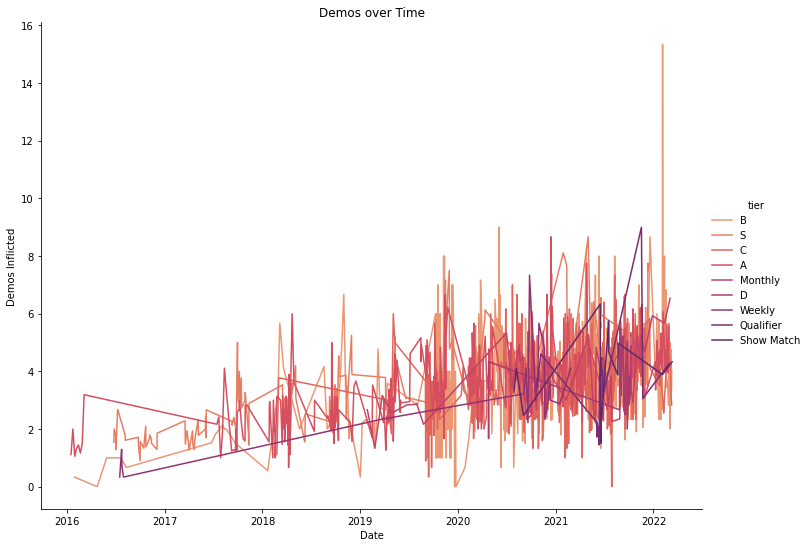

In [191]:
palette = sns.color_palette("flare", n_colors=9)

demos_over_time = sns.relplot(x="date", y="stats.demo.inflicted",
            kind="line", data=blue_players, hue="tier", ci=None, palette=palette,
            height=7.5, aspect=10/7.5)
demos_over_time.ax.set_title("Demos over Time")
demos_over_time.set_axis_labels("Date" , "Demos Inflicted")

This is immediately pretty cool. We can see a clear increase in demos inflicted over time——and can make a reasonable assumption that this is the result of a shift towards more aggressive playstyles characterized by bumps, demos and boost steals.

Unfortunately, it isn't quite clear from this graph whether there is a significant difference in the number of demos per series when we split by tier.

*Note: The graph looks a bit messy, but if we had bootstrapping/confidence interval estimations surrounding our data, I think it would look worse haha so it's a deliberate design choice*

Let's check out any potential outliers:

<AxesSubplot:xlabel='tier', ylabel='stats.demo.inflicted'>

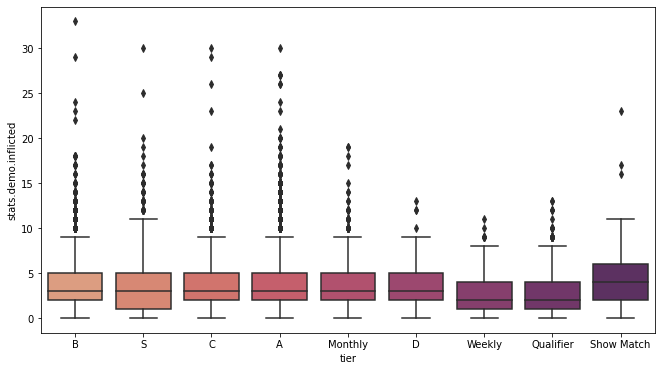

In [195]:
plt.figure(figsize=(11,6))
sns.boxplot(x="tier", y="stats.demo.inflicted", data=blue_players, palette=palette)

There definitely do seem to be many outliers in each tier, falling outside of our 1.5xIQR whiskers. I could be looking too much into it, but aggressive playstyles by one team do tend to elicit increased aggressiveness by the opposing team as a countermeasure strategy (or if they're tilted and just on the hunt), and I would guess many of the outlier series displayed here played out that way.

In [175]:
blue_players.groupby(["tier"])["stats.demo.inflicted"].max()

tier
A             30.0
B             33.0
C             30.0
D             13.0
Monthly       19.0
Qualifier     13.0
S             30.0
Show Match    23.0
Weekly        11.0
Name: stats.demo.inflicted, dtype: float64

#### Idea: find which teams were involved in these outlier series. Maybe there will be a common team who's aggressive af lol

In [141]:
blue_players.groupby(["tier"])["stats.demo.inflicted"].mean()

tier
A             3.853482
B             3.518238
C             3.465504
D             3.811111
Monthly       3.668524
Qualifier     2.500268
S             3.336512
Show Match    4.326923
Weekly        2.974359
Name: stats.demo.inflicted, dtype: float64

#### To-do: Make the above table a graph over time, by just taking intervals of months, or even quarters. Makes for a clean visualisation of the mean demos inflicted by tier

In [81]:
blue_players.groupby("series_identifier")["stats.core.shots"].mean()

series_identifier
0        13.666667
1         9.333333
2        12.666667
3         4.000000
4        14.666667
           ...    
32660          NaN
32661          NaN
32662          NaN
32663          NaN
32664          NaN
Name: stats.core.shots, Length: 32665, dtype: float64